In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")


In [8]:
# Load the data
df = pd.read_csv("train.csv")

# View the top rows
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Select relevant columns
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

df = df[features + [target]]

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (safe for this dataset)
df.dropna(inplace=True)

# Display dataset shape
print("Dataset Shape:", df.shape)


GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64
Dataset Shape: (1460, 4)


<ipython-input-9-2849206955>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


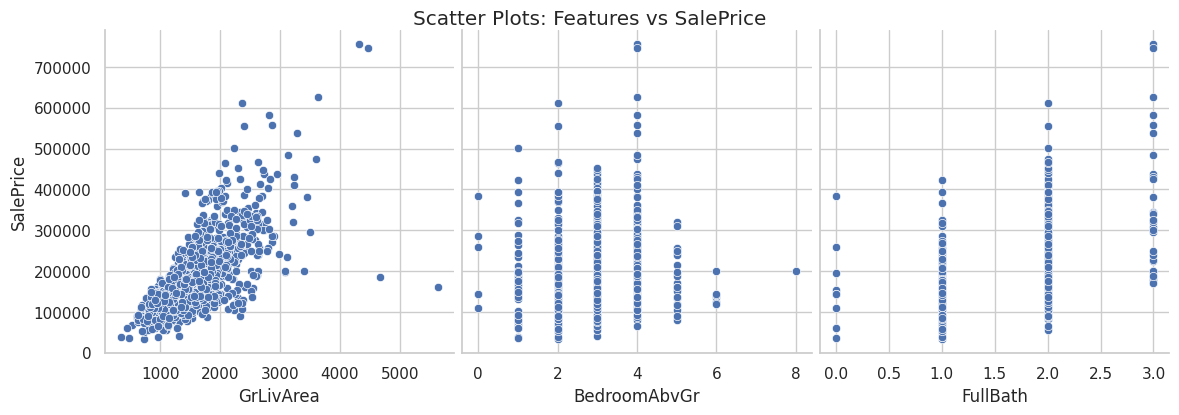

In [10]:
# Pairplot of features vs SalePrice
sns.pairplot(df, x_vars=features, y_vars='SalePrice', height=4, aspect=1, kind='scatter')
plt.suptitle("Scatter Plots: Features vs SalePrice", y=1.02)
plt.show()


In [11]:
# Define X and y
X = df[features]
y = df['SalePrice']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
coeffs = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
})
print(coeffs)


        Feature   Coefficient
0     GrLivArea    104.026307
1  BedroomAbvGr -26655.165357
2      FullBath  30014.324109


In [13]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Mean Squared Error:", round(mse, 2))
print(" R² Score:", round(r2, 4))


📊 Mean Squared Error: 2806426667.25
📈 R² Score: 0.6341


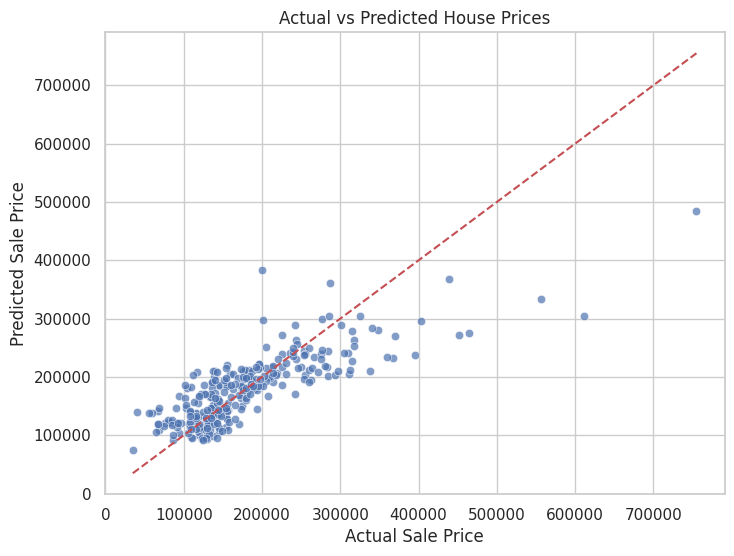

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.show()


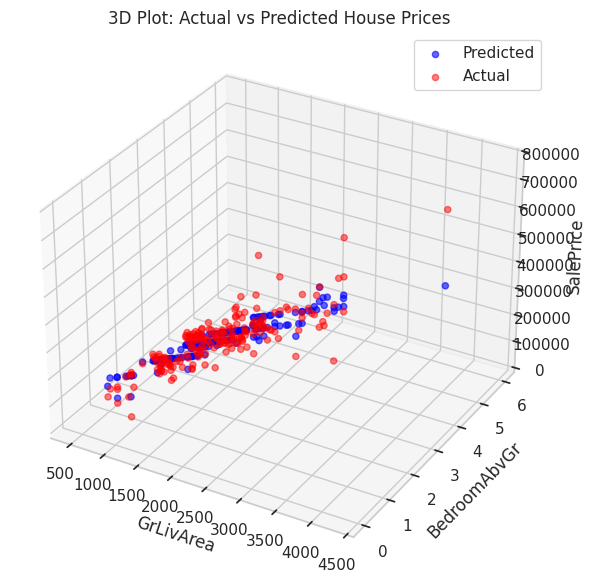

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use first 200 for clear visualization
ax.scatter(X_test['GrLivArea'][:200],
           X_test['BedroomAbvGr'][:200],
           y_pred[:200],
           c='blue', label='Predicted', alpha=0.6)

ax.scatter(X_test['GrLivArea'][:200],
           X_test['BedroomAbvGr'][:200],
           y_test[:200],
           c='red', label='Actual', alpha=0.5)

ax.set_xlabel('GrLivArea')
ax.set_ylabel('BedroomAbvGr')
ax.set_zlabel('SalePrice')
ax.set_title('3D Plot: Actual vs Predicted House Prices')
ax.legend()

plt.show()
